DATA CLEANING AND EXPLORATORY ANALYSIS WITH DATADAFT
----

Titanic Train Data
- https://www.kaggle.com/datasets/hesh97/titanicdataset-traincsv?resource=download

Actions
- Exploratory Data Analysis
- Data Cleaning
- Null Checks
- NaN Checks
- Duplicate Checks
- Drop Duplicates

Import Libraries

In [2]:
import pandas as pd
import numpy as np

READ Train Data

In [3]:
df = pd.read_csv('train.csv')

VIEW dataframe

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


CHECK Data Dimensions - Explore

In [5]:
df.shape

(891, 12)

CHECK DATA DETAILS - Explore

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


NULL CHECK - Explore

In [7]:
df.isnull().sum().to_frame(name='Nulls').reset_index()

,index,Nulls
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,177
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


Descriptive view of the data

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


FIND Categorical Data

In [9]:
categorical = df.dtypes[df.dtypes == 'object'].index
df[categorical].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Look closer at the "Name" field

In [10]:
sorted(df['Name'])[0:15]

['Abbing, Mr. Anthony',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Alexander, Mr. William',
 'Alhomaki, Mr. Ilmari Rudolf',
 'Ali, Mr. Ahmed',
 'Ali, Mr. William',
 'Allen, Miss. Elisabeth Walton']

Look closer at the "Ticket" field


In [11]:
df['Ticket'][0:15]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [12]:
df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [13]:
new_survived = pd.Categorical(df['Survived'])
new_survived

new_survived = new_survived.rename_categories(['Died', 'Survived'])
new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [14]:
df['Survived'] = new_survived

In [15]:
new_pclass = pd.Categorical(df['Pclass'])
new_pclass

new_pclass = new_pclass.rename_categories(['Elite','Business','Standard' ])
new_pclass.describe()

,counts,freqs
categories,,
Elite,216,0.242424
Business,184,0.206510
Standard,491,0.551066


In [16]:
df['Pclass'] = new_pclass

Closer look at the "Cabin" Field

In [17]:
char_cabin = df['Cabin'].astype(str)
new_cabin = np.array([cabin[0] for cabin in char_cabin])
new_cabin = pd.Categorical(new_cabin)
new_cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


Save Over old cabin variable

In [18]:
df['Cabin'] = new_cabin

Closer look at the "Age" column - Returns the corresponding indices

In [19]:
missingAges = np.where(df['Age'].isnull() == True)
missingAges

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

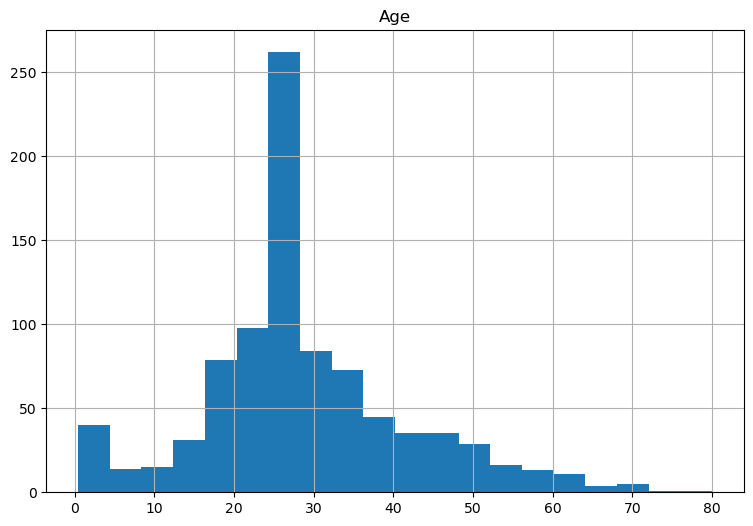

In [28]:
df.hist(column='Age', figsize=(9,6), bins=20)

FIND the Age Mean

In [22]:
df['Age'].mean()

29.69911764705882

Handling Missing Values in Age Column - Median

In [26]:
new_age = np.where(df['Age'].isnull(), 28, df['Age'])

In [24]:
df['Age'] = new_age

ANALYIZE the Age Statistical Data

In [27]:
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

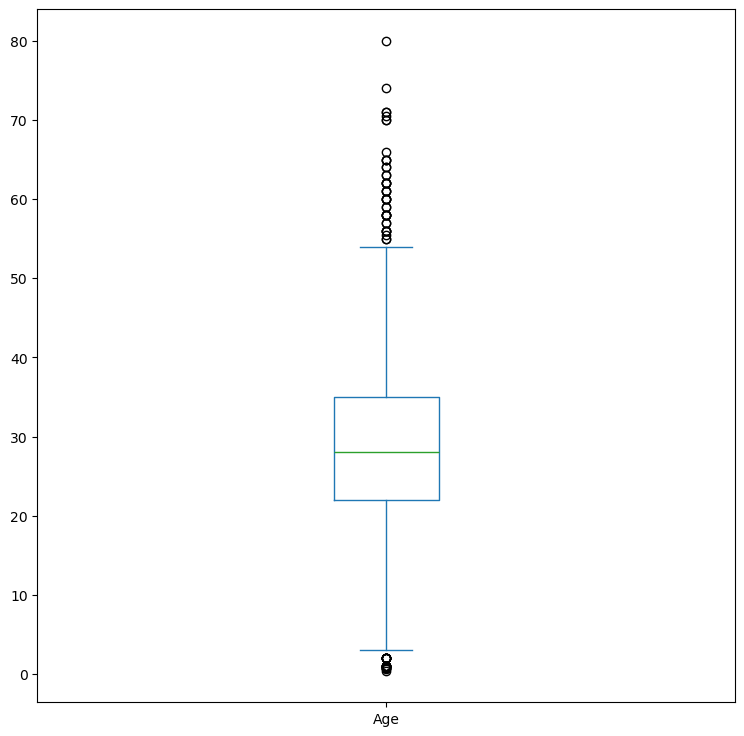

In [29]:
df['Age'].plot(kind='box', figsize=(9,9))

View Most Sitted Outlier - Age

In [34]:
df[df['Age'] == df['Age'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,Survived,Elite,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A,S


View Ages Above the Median

In [43]:
df[df['Age'] > df['Age'].median()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,Survived,Elite,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
3,4,Survived,Elite,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,Died,Standard,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S
6,7,Died,Elite,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
11,12,Survived,Elite,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C,S
...,...,...,...,...,...,...,...,...,...,...,...,...
873,874,Died,Standard,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,n,S
879,880,Survived,Elite,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,C
881,882,Died,Standard,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,n,S
885,886,Died,Standard,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,n,Q


EOF
---